## Synthetic Data 

### Utils functions




In [1]:
import random
import cv2
from utils.utils_sintetic import draw_infos_image




def string_random_sequence(lenght: int) -> list:
    s = ""
    text = ""
    #insertining char every insertion should consider the preceding insetions in the indices enumeration
    list_parentesis = [[0,3],[18,21],[28,31]]
    for i in range(lenght) :
        number = random.randint(0,9)
        s += str(number)
    
    text = s
    for positions in list_parentesis :
        positions_i = positions[0]
        positions_f = positions[1]
        text = text[:positions_i] + '(' + text[positions_i:]
        text = text[:positions_f] + ')' + text[positions_f:]
    #print(text)
    return s,text

def resize(scale_percent: int ,img):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

def resize_PIL(scale_percent: int,img):

    width = int(img.size[1] * scale_percent / 100)
    height = int(img.size[0] * scale_percent / 100)
    dim = (height,width)
    img = img.resize(dim)

    # resize image
    return img

def resize_PIL_scale(scale: int,img):

    dim = (scale[0],scale[1])
    img = img.resize(dim)

    # resize image
    return img

def data_generator_format(format : str) -> dict :
    data = dict()
    if format == "34":

        rand = string_random_sequence(34)

        info = rand[0]
        info_full = rand[1]


        lot_number = info[-8:]
        sep2 = info[-10:-8]
        date = info[-18:-10]
        sep1 = info[-20:-18]
        id = info[-34:-20]
        sep0 = info[0:2]

        data["text"] = info
        data["text_full"] = info_full
        data["sep0"] = sep0
        data["id"] = id
        data["sep1"] = sep1
        data["date"] = date
        data["sep2"] = sep2
        data["lot_number"] = lot_number


        """
        print("info_full",info_full)
        print("sep0",sep0)
        print("id",id)
        print("sep1",sep1)
        print("date",date)
        print("sep2",sep2)
        print("lot_number",lot_number)
        """
    else :
        print("ERROR FORMA T NOT AVAILABLE")

    return data

### Datamatrix Generation

In [3]:
from pathlib import Path
import os
from barcode.codex import Code128
from barcode.writer import ImageWriter
import torchvision.transforms.functional as TF
import treepoem
from pathlib import Path
import json


current = os.getcwd()
path = Path(current)
#project_path = path.parent.parent.absolute()
project_path = path

def data_generator(root_path,lenght : int, distibution : list, transformations : dict) : 

    assert sum(distibution) == 100, print("ERROR :Sum of distribution should be 100%")
    list = [int((lenght * int(percentage))/100) for percentage in distibution]
    
    LIST_NAME = ["train","test","val"]

    #create directories do not exit
    hd_path = os.path.join(root_path,"hd")
    list_hd_path = [os.path.join(hd_path,path) for path in LIST_NAME]

    ld_path = os.path.join(root_path,"ld")
    list_ld_path = [os.path.join(ld_path,path) for path in LIST_NAME]

    inter_path = os.path.join(root_path,"interpolate")
    list_inter_path = [os.path.join(inter_path,path) for path in LIST_NAME]
    

    for path in list_hd_path:
        print(path)
        Path(path).mkdir(parents=True, exist_ok=True)

    
    for path in list_ld_path:
        Path(path).mkdir(parents=True, exist_ok=True)
        print(path)
    
    
    for path in list_inter_path:
        Path(path).mkdir(parents=True, exist_ok=True)
        print(path)
    



    counter = 0
    #loop
    with open('data/DATAMATRIX/annotation.json', 'w') as outfile:
        
        data = dict()
        
        
        for i in range(3):

            counter = 0

            actual_path = list_hd_path[i]
            actual_res_path = list_ld_path[i]
            actual_inter_path = list_inter_path[i]

            #train test val
            list_mode = []
            
            while counter < list[i]:  

                ELEMENT = dict()
  

                generated_string,text = string_random_sequence(44)

                base = "image"
                image = str(base)+"_"+str(counter)+".png"
                image_path = os.path.join(actual_path,image)
                ELEMENT["id"] = str(base)+"_"+str(counter)
                ELEMENT["data"] = generated_string
                ELEMENT["hd"] = image_path

                

                img = treepoem.generate_barcode(barcode_type="datamatrix",data=generated_string)
                img = img.convert("1")
                img.save(image_path)
                scale = img.size

            
                img = resize_PIL(transformations["resize"],img)
                resized_image_path = os.path.join(actual_res_path,image)
                ELEMENT["ld"] = resized_image_path
                img.save(resized_image_path)


                img_inter = resize_PIL_scale(scale,img)
                interpolate_image_path = os.path.join(actual_inter_path,image)
                ELEMENT["it"] = interpolate_image_path
                img_inter.save(interpolate_image_path)

                list_mode.append(ELEMENT)
                
                counter += 1


            data[LIST_NAME[i]] = list_mode
        
        json.dump(data, outfile, indent=4)
            

transformations = {}
transformations["resize"] = 50

PATH_RELATIVE = "data/DATAMATRIX"
PATH = os.path.join(project_path,PATH_RELATIVE)
data_generator(PATH,500,[70,20,10],transformations)




/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/hd/train
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/hd/test
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/hd/val
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/ld/train
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/ld/test
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/ld/val
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/interpolate/train
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/interpolate/test
/home/mv/Desktop/DM_reco/DM_reco/data/DATAMATRIX/interpolate/val


In [6]:
import numpy as np
from PIL import Image

def generate_gt(data_path):  

    with open('data/DATAMATRIX/annotationsGT.json', 'w') as outfile:

        with open(data_path) as f:  

            d = json.load(f)
            data = dict()
            LIST_NAME = ["train","test","val"]


            for i,mode in enumerate(d) :
                
                data_ = d[mode]
                list_mode = []
                
                for image_ in data_:
                    
                    path = image_["hd"]
                    #imageRGB = Image.open(path)
                    #imageRGB = imageRGB.convert('RGB')

                    image_ori = cv2.imread(path)
                    #white border elimination
                    
                    image = image_ori[1:-1,1:-1]
                    #image line

                    #image line

                    
                
                    N = 4
                    #80 pixels for 20 cubes dimension
                    tiles = [image[x:x+N,y:y+N] for x in range(0,image.shape[0],N) for y in range(0,image.shape[1],N)]
                    gt = []
                    
                    
                    for tile in tiles :
                        tile = tile[:,:,0]
                        m = np.mean(tile)
                        if m == 255 :
                            m = 1

                        gt.append(m)
                    

                    gt = np.array(gt)
                    gt = gt.reshape((20,20))

                    image_["gt"] = gt.tolist() 
            
                    list_mode.append(image_)
                    cv2.imwrite(path,image)
            
                print(LIST_NAME[i])
                data[LIST_NAME[i]] = list_mode
        


        
        
        json.dump(data, outfile, indent=6)


        
generate_gt("data/DATAMATRIX/annotation.json")








train
test
val


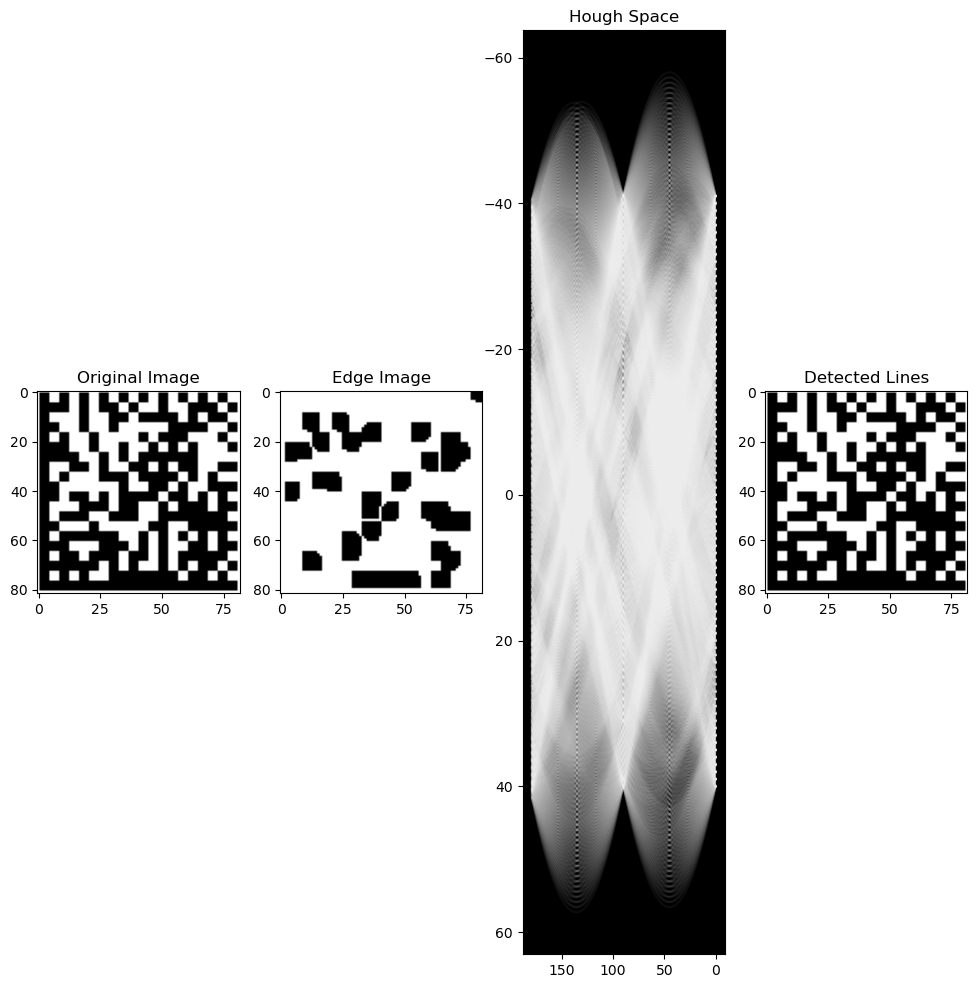

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.15965512e+02, -1.14677006e+02, -1.13388501e+02, -1.12099995e+02,
        -1.10811489e+02, -1.09522984e+02, -1.08234478e+02, -1.06945972e+02,
        -1.05657467e+02, -1.04368961e+02, -1.03080455e+02, -1.01791950e+02,
        -1.00503444e+02, -9.92149381e+01, -9.79264325e+01, -9.66379268e+01,
        -9.53494211e+01, -9.40609154e+01, -9.27724097e+01, -9.14839040e+01,
        -9.01953983e+01, -8.89068926e+01, -8.76183869e+01, -8.63298812e+01,
        -8.50413756e+01, -8.37528699e+01, -8.24643642e+01, -8.11758585e+01,
        -7.98873528e+01, -7.85988471e+01, -7.73103414e+01, -7.60218357e+01,
        -7.47333300e+01, -7.34448243e+01, -7.21563186e+01, -7.08678130e+01,
        -6.95793073e+01, -6.82908016e+01, -6.70022959e+01, -6.57137

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def line_detection_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  edge_points = np.argwhere(edge_image != 0)
  edge_points = edge_points - np.array([[edge_height_half, edge_width_half]])
  #
  rho_values = np.matmul(edge_points, np.array([sin_thetas, cos_thetas]))
  #
  accumulator, theta_vals, rho_vals = np.histogram2d(
      np.tile(thetas, rho_values.shape[0]),
      rho_values.ravel(),
      bins=[thetas, rhos]
  )
  accumulator = np.transpose(accumulator)
  lines = np.argwhere(accumulator > t_count)
  rho_idxs, theta_idxs = lines[:, 0], lines[:, 1]
  r, t = rhos[rho_idxs], thetas[theta_idxs]

  for ys in rho_values:
    subplot3.plot(thetas, ys, color="white", alpha=0.05)

  subplot3.plot([t], [r], color="yellow", marker='o')

  for line in lines:
    y, x = line
    rho = rhos[y]
    theta = thetas[x]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * rho) + edge_width_half
    y0 = (b * rho) + edge_height_half
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    subplot3.plot([theta], [rho], marker='o', color="yellow")
    subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas



image = cv2.imread("data/DATAMATRIX/hd/test/image_0.png")
edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.Canny(edge_image, 100, 200)
edge_image = cv2.dilate(
    edge_image,
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    iterations=1
)
edge_image = cv2.erode(
    edge_image,
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    iterations=1
)
line_detection_vectorized(image, edge_image)


In [72]:
import numpy as np
import cv2

gray = cv2.imread("data/DATAMATRIX/hd/test/image_0.png")
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=10
lines = cv2.HoughLinesP(image=edges,rho=0.02,theta=np.pi/180, threshold=9,lines=np.array([]), minLineLength=minLineLength,maxLineGap=100)

a,b,c = lines.shape
for i in range(a):

    def filter_lines(A,B):
        diff_x = B[0]-A[0]
        diff_y =  B[1]-A[1]
        assert diff_x > 0
        assert diff_y > 0
        

        if diff_x == 0:
            flag_h = False
            return flag_h,True
        elif diff_y == 0:
            flag_h = True
            return flag_h,True

        slope = diff_y/diff_x
        slope_inv = 1/slope


        if slope < 0.1 :
            flag_h = True
            return flag_h,True
        elif slope_inv < 0.1 :
            flag_h = False
            return flag_h,True
        
        return None,None




    
    
    
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',gray)